<a href="https://colab.research.google.com/github/girishkuks/data_science/blob/main/Linear_Regresson_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/girishkuks/data_science/refs/heads/main/BostonHousing.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


I've recently uploaded a dataset called Boston Housing Metrics, which contains detailed information about various attributes related to housing in the Boston area. The dataset includes the following columns:

crim: Per capita crime rate by town.
zn: Proportion of residential land zoned for large lots (over 25,000 sq. ft.).
indus: Proportion of non-retail business acres per town.
chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
nox: Nitric oxides concentration (parts per 10 million).
rm: Average number of rooms per dwelling.
age: Proportion of owner-occupied units built prior to 1940.
dis: Weighted distances to five Boston employment centers.
rad: Index of accessibility to radial highways.
tax: Full-value property-tax rate per $10,000.
This dataset provides valuable insights into the housing market dynamics and socio-economic factors influencing property values in Boston.

Dataset link: https://www.kaggle.com/datasets/krupadharamshi/bostonhousing

Thank you for your interest!

In [36]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [37]:
data.columns = data.columns.str.upper()

In [38]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
data.dtypes

,0
CRIM,float64
ZN,float64
INDUS,float64
CHAS,int64
NOX,float64
RM,float64
AGE,float64
DIS,float64
RAD,int64
TAX,int64


In [ ]:
## Data Cleaning

In [13]:
data.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [9]:
## Check outliers

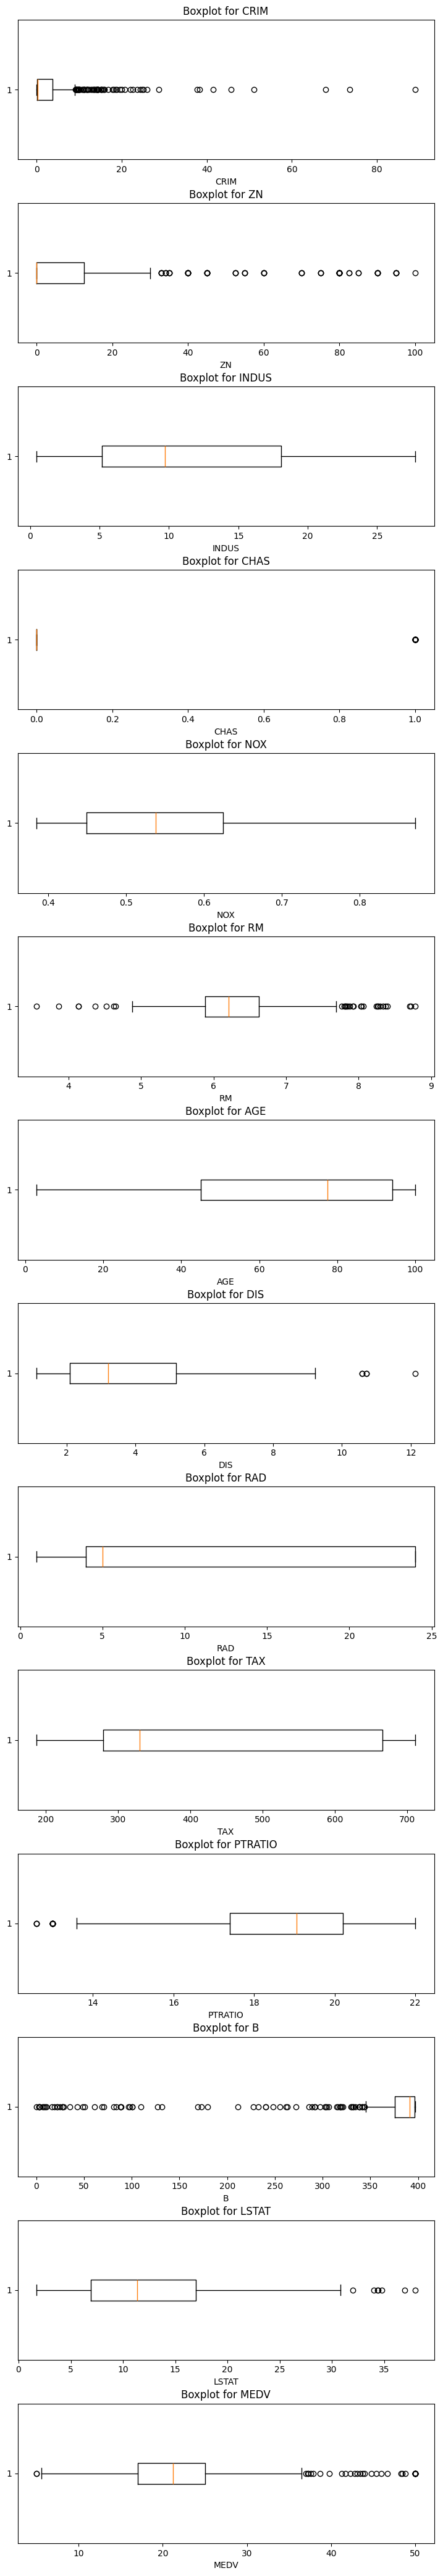

In [40]:
num_cols = len(data.columns)
fig, axes = plt.subplots(num_cols,1, figsize=(8,num_cols * 3))
fig.tight_layout(pad=3.0)

for i, col in enumerate(data.columns):
  ax = axes[i]
  ax.boxplot(data[col], vert=False)
  ax.set_xlabel(col)
  ax.set_title(f'Boxplot for {col}')
plt.show()

In [20]:
data['']

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [41]:
for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - IQR*1.5
  upper = Q3 + IQR*1.5

  data[col] = data[col].clip(lower,upper)

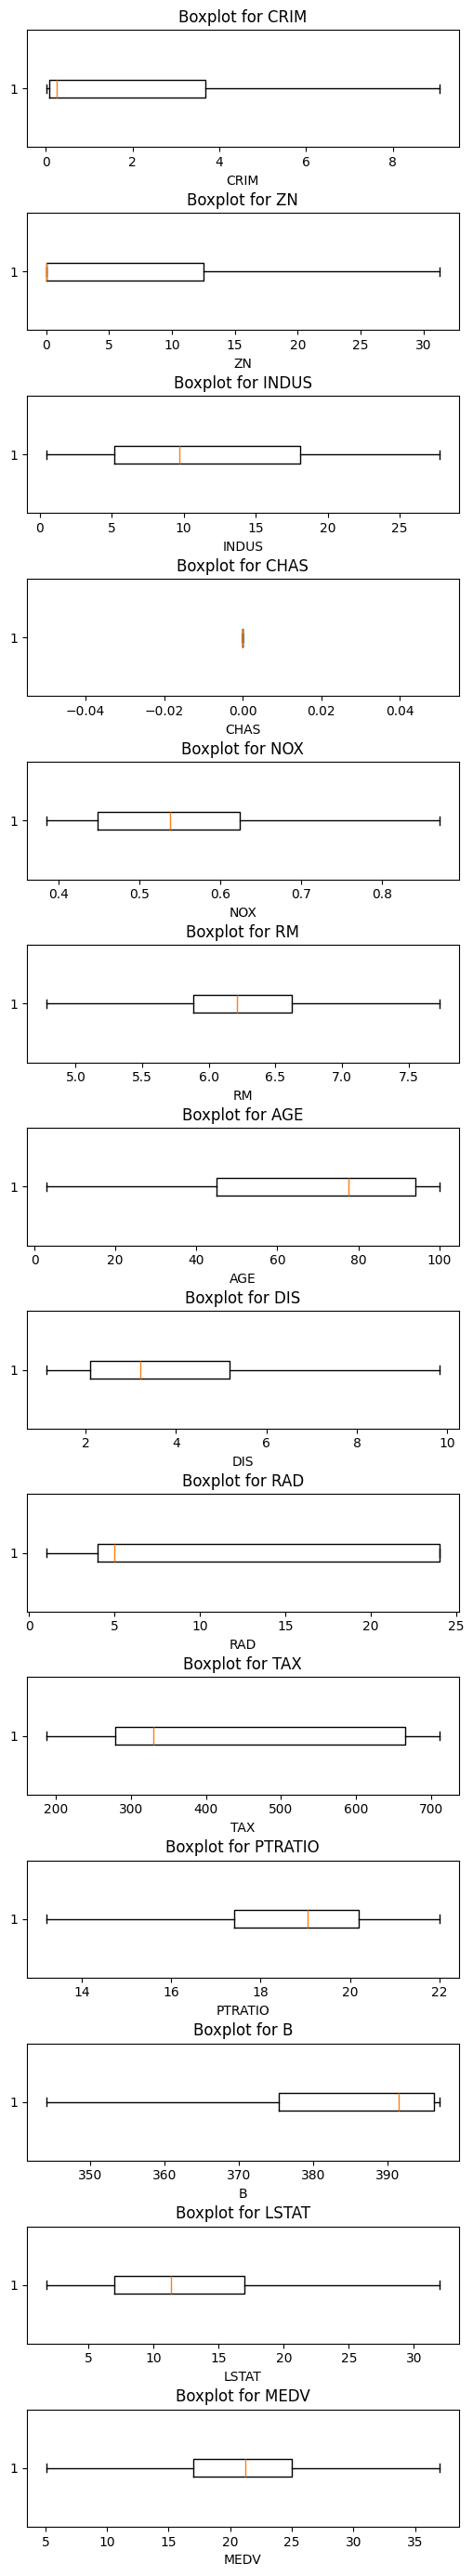

In [42]:
num_cols = len(data.columns)
fig, axes = plt.subplots(num_cols,1, figsize=(6,num_cols * 2))
fig.tight_layout(pad=3.0)

for i, col in enumerate(data.columns):
  ax = axes[i]
  ax.boxplot(data[col], vert=False)
  ax.set_xlabel(col)
  ax.set_title(f'Boxplot for {col}')
plt.show()

In [43]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.370213,0.629315,NaN,0.663412,-0.260057,0.518951,-0.555054,0.926977,0.870686,0.416269,-0.436156,0.592587,-0.538589
ZN,-0.370213,1.000000,-0.584079,NaN,-0.549670,0.357439,-0.583149,0.681019,-0.344043,-0.383860,-0.432409,0.236768,-0.448131,0.428126
INDUS,0.629315,-0.584079,1.000000,NaN,0.763651,-0.408704,0.644779,-0.713079,0.595129,0.720760,0.382359,-0.417485,0.608158,-0.561174
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.663412,-0.549670,0.763651,NaN,1.000000,-0.322413,0.731470,-0.775934,0.611441,0.668023,0.190159,-0.427034,0.595619,-0.506505
RM,-0.260057,0.357439,-0.408704,NaN,-0.322413,1.000000,-0.258788,0.224486,-0.206041,-0.292737,-0.353695,0.196260,-0.634425,0.697645
AGE,0.518951,-0.583149,0.644779,NaN,0.731470,-0.258788,1.000000,-0.753333,0.456022,0.506456,0.263355,-0.307560,0.606711,-0.458662
DIS,-0.555054,0.681019,-0.713079,NaN,-0.775934,0.224486,-0.753333,1.000000,-0.500007,-0.540200,-0.238556,0.311406,-0.502644,0.333079
RAD,0.926977,-0.344043,0.595129,NaN,0.611441,-0.206041,0.456022,-0.500007,1.000000,0.910228,0.466698,-0.392793,0.489186,-0.452679
TAX,0.870686,-0.383860,0.720760,NaN,0.668023,-0.292737,0.506456,-0.540200,0.910228,1.000000,0.462693,-0.433288,0.545598,-0.543545


<Axes: >

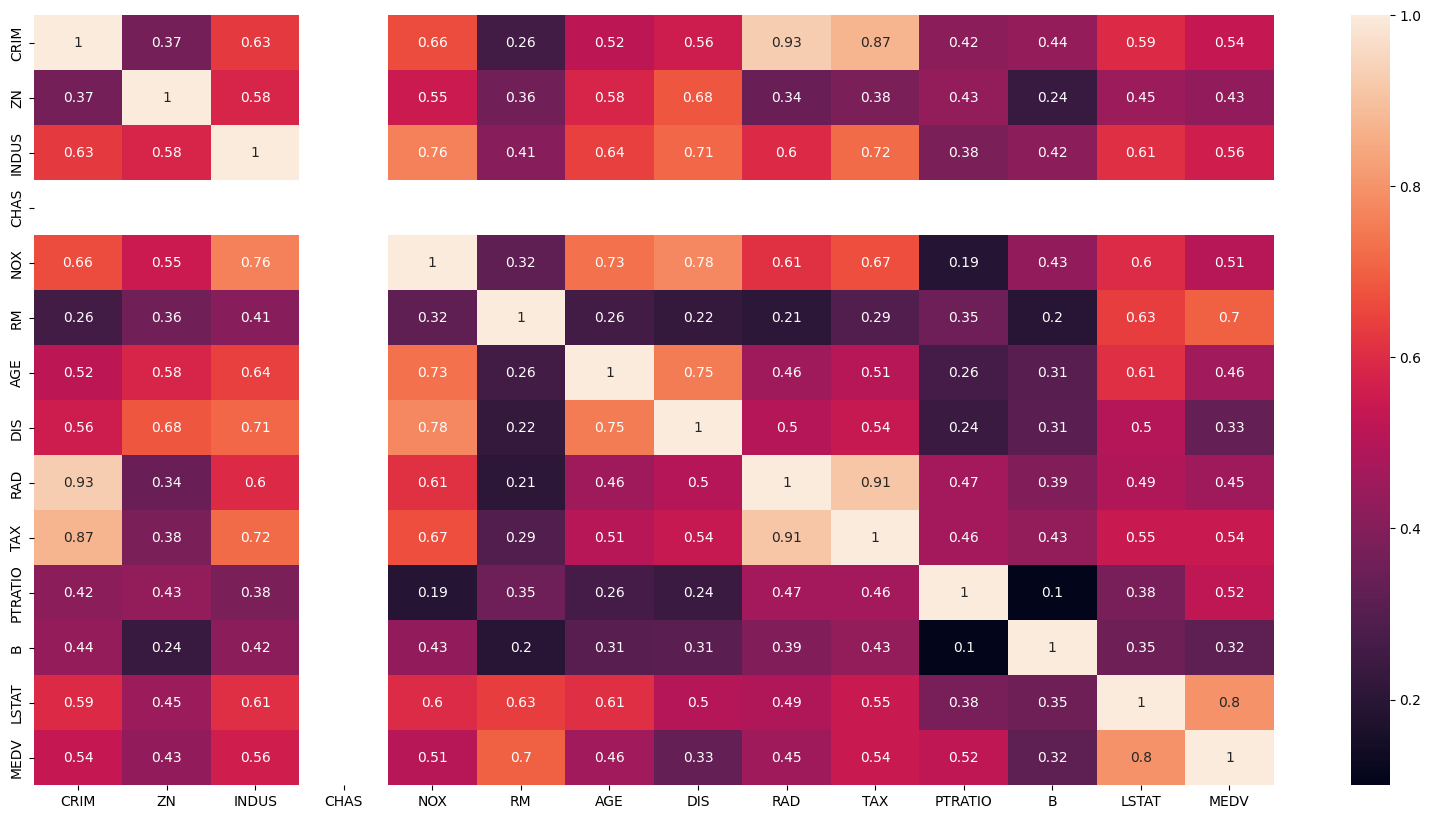

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

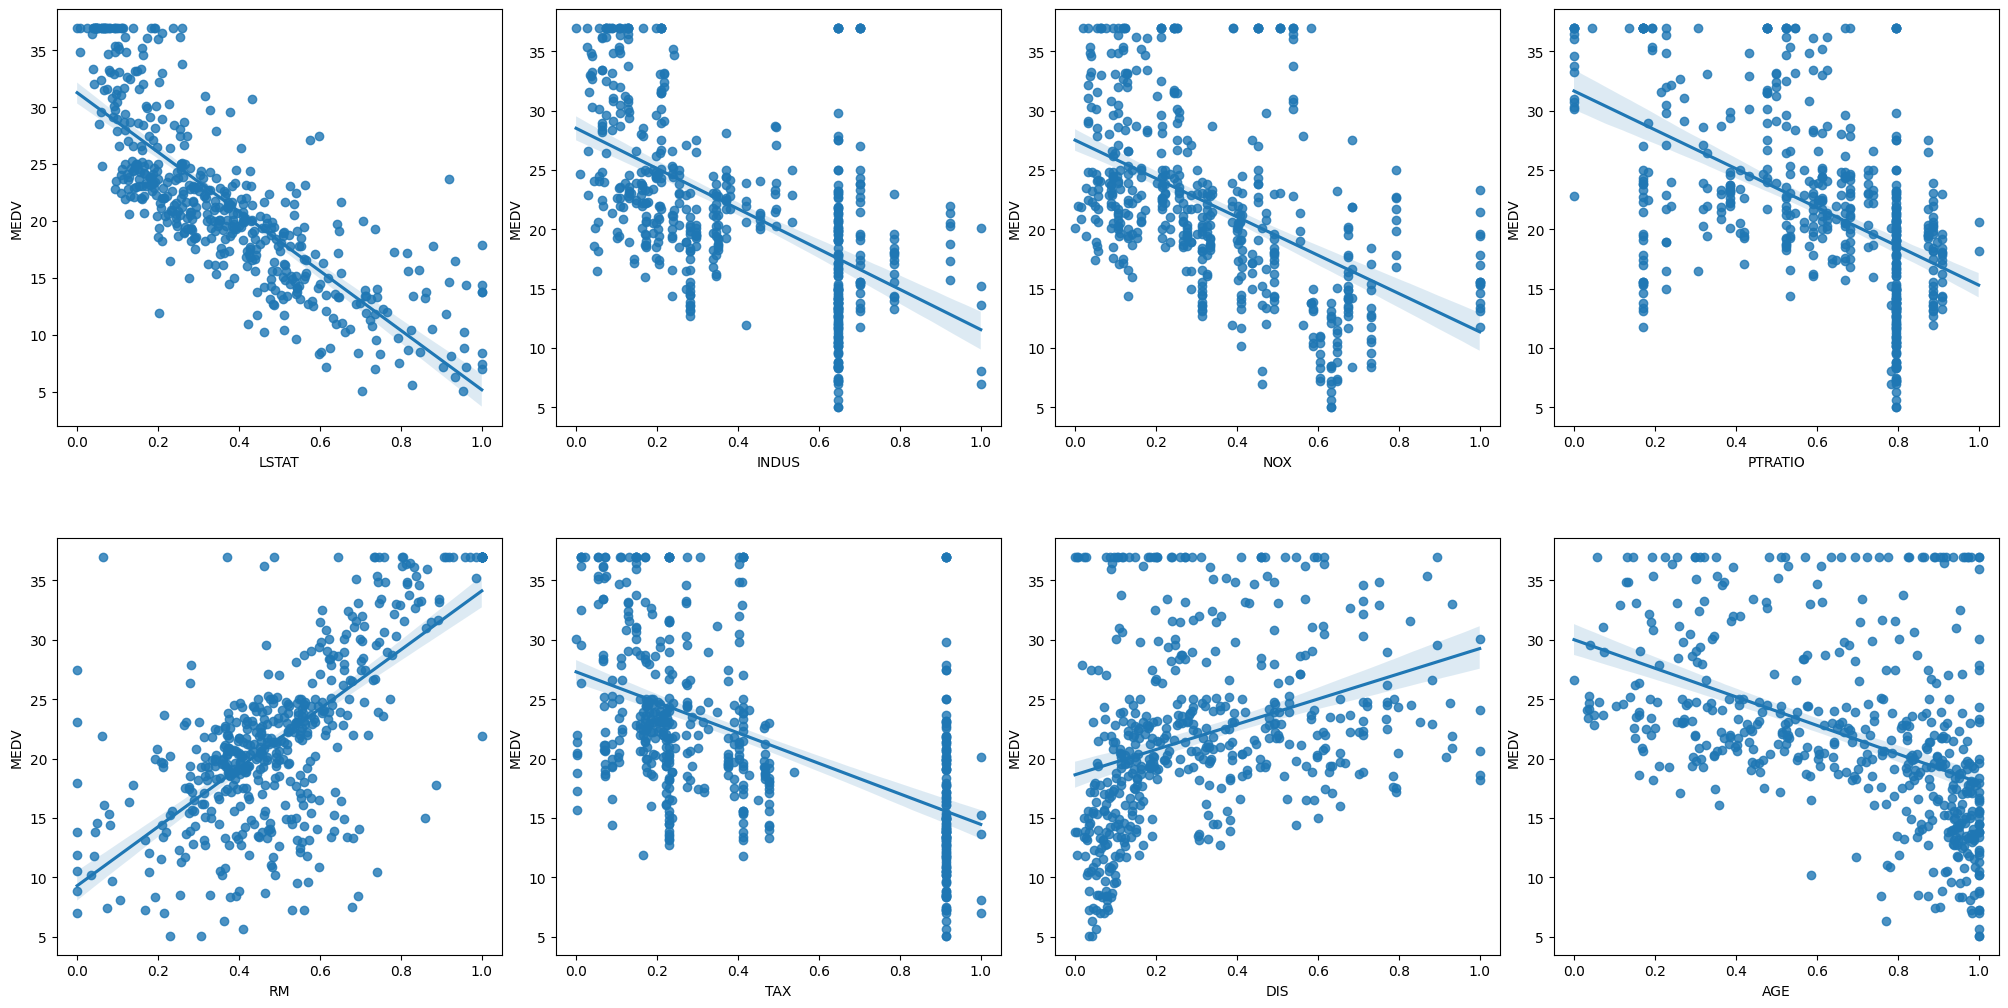

In [45]:
from sklearn import preprocessing
import seaborn as sns
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

X= data.drop(columns=['MEDV','CHAS','RAD','CRIM','ZN','B'])
Y= data['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled,Y_train)

Y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('R2 Square-----',r2_score(Y_test, Y_pred))
print('mean absolute error----', mean_squared_error(Y_test, Y_pred))


R2 Square----- 0.7374816696818012
mean absolute error---- 12.843696189947849


In [47]:
### Now try with polynomial

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()

poly_model.fit(X_train_poly,Y_train)

print(X_test_scaled.shape)
print(X_train_poly.shape)
print(X_train_scaled.shape)


Y_poly_pred = poly_model.predict(X_test_poly)

print('R2 Square-----',r2_score(Y_test, Y_poly_pred))
print('mean absolute error----', mean_squared_error(Y_test, Y_poly_pred))

(102, 8)
(404, 44)
(404, 8)
R2 Square----- 0.824677925525532
mean absolute error---- 8.577623730929908


In [ ]:
## Regularisation using Ridge or Lasso

In [55]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param_grid = {'alpha':[0.1,1,10,100]}

ridge_cv = GridSearchCV(ridge, param_grid, scoring = 'neg_mean_squared_error', cv=5)

ridge_cv.fit(X_train_scaled,Y_train)

print('Best Ridge Parameters',ridge_cv.best_params_)


lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid=param_grid, scoring= 'neg_mean_squared_error', cv=5)

lasso_cv.fit(X_train_scaled, Y_train)

print('Best Lasso parameters', lasso_cv.best_params_)

Best Ridge Parameters {'alpha': 1}
Best Lasso parameters {'alpha': 0.1}


In [ ]:
## Rerun the model using Ridge with best parameters

In [56]:
best_alpha = ridge_cv.best_params_['alpha']

final_ridge_model = Ridge(alpha=best_alpha)

final_ridge_model.fit(X_train_scaled, Y_train)

Y_pred_ridge = final_ridge_model.predict(X_test_scaled)


print('R2 Square-----',r2_score(Y_test, Y_pred_ridge))
print('mean absolute error----', mean_squared_error(Y_test, Y_pred_ridge))


R2 Square----- 0.7377121485688783
mean absolute error---- 12.832420021917116


In [ ]:
## Run using Lasso

In [59]:
best_alpha_lasso = lasso_cv.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha_lasso)

lasso_model.fit(X_train_scaled,Y_train)

Y_pred_lasso = lasso_model.predict(X_test_scaled)

print('R2 Square-----',r2_score(Y_test, Y_pred_lasso))
print('mean absolute error----', mean_squared_error(Y_test, Y_pred_lasso))


R2 Square----- 0.7424434079541822
mean absolute error---- 12.600943392963147
